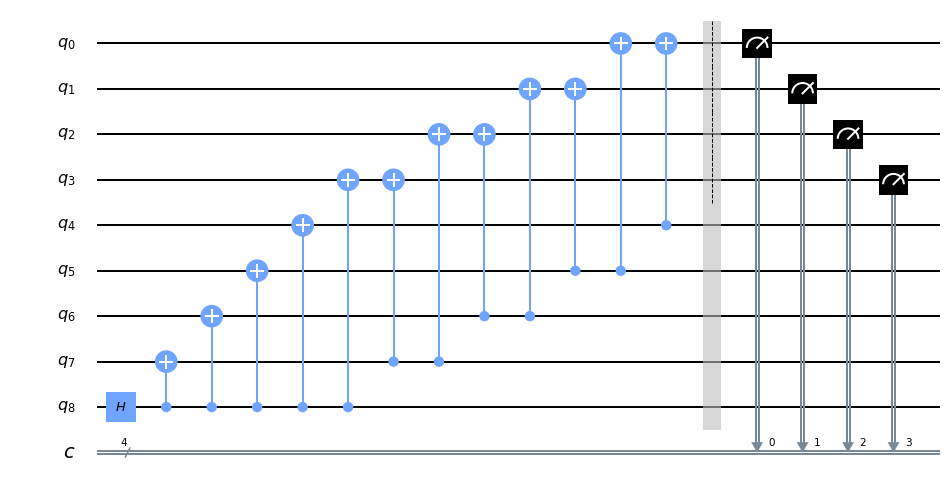

In [2]:
import numpy as np
from qiskit import *
%matplotlib inline

#encoding one qubit into 5 qubits
circ = QuantumCircuit(9)
circ.h(8)
circ.cx(8,7)
circ.cx(8,6)
circ.cx(8,5)
circ.cx(8,4)

#error detection with the stabilazors Z0Z1,Z1Z2, Z2Z3, Z3Z4

circ.cx(8,3)
circ.cx(7,3)
circ.cx(7,2)
circ.cx(6,2)
circ.cx(6,1)
circ.cx(5,1)
circ.cx(5,0)
circ.cx(4,0)
#measuring of the qubits and drawing of the final quantum circuit (qc)
meas = QuantumCircuit(9,4)
meas.barrier(range(4))
meas.measure(range(4),range(4))
qc=circ+meas
qc.draw()

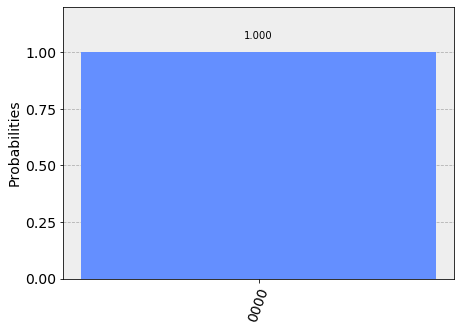

In [4]:
#simulation of the circuit with the "perfect" siulator
backend_sim = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend_sim, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc)
from qiskit.visualization import plot_histogram
plot_histogram(counts)

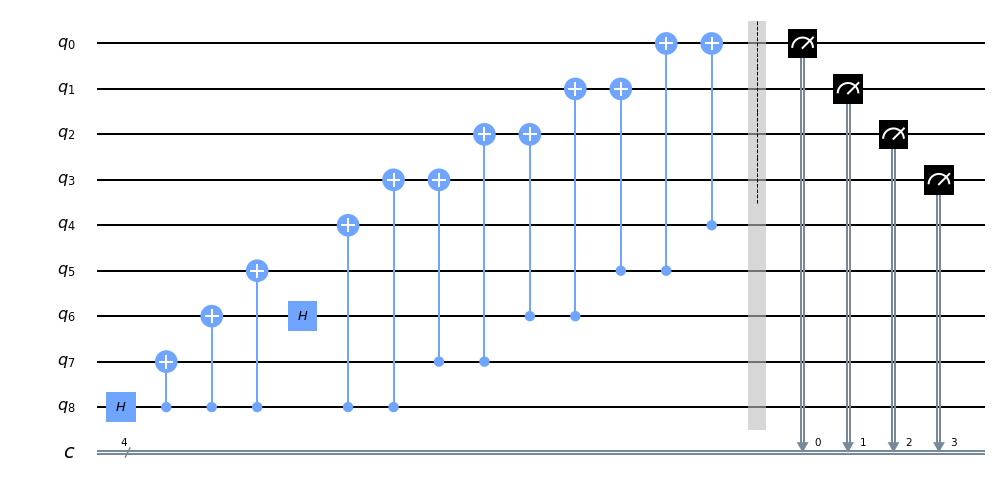

In [5]:
#We can introduce an error on one of the qubits and see the effect
#encoding one qubit into 5 qubits
circ = QuantumCircuit(9)
circ.h(8)
circ.cx(8,7)
circ.cx(8,6)
circ.cx(8,5)
circ.cx(8,4)
circ.h(6)

#error detection with the stabilazors Z0Z1,Z1Z2, Z2Z3, Z3Z4

circ.cx(8,3)
circ.cx(7,3)
circ.cx(7,2)
circ.cx(6,2)
circ.cx(6,1)
circ.cx(5,1)
circ.cx(5,0)
circ.cx(4,0)
#measuring of the qubits and drawing of the final quantum circuit (qc)
meas = QuantumCircuit(9,4)
meas.barrier(range(4))
meas.measure(range(4),range(4))
qcerr=circ+meas
qcerr.draw()


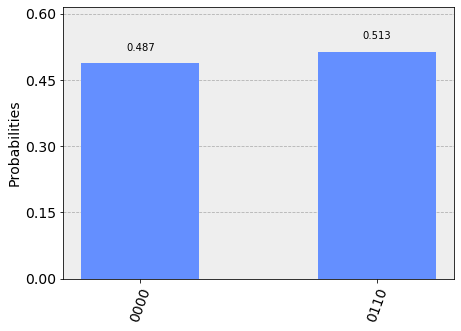

In [6]:
#We have a possible bit-flip error on the qubit 6 with an average proba of 50%.
#lets do the measurement again
backend_sim = Aer.get_backend('qasm_simulator')
job_sim = execute(qcerr, backend_sim, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(qcerr)
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [7]:
#qubit 1 and 2 have been measured as "1" instead of "0".
#thanks to q1, we know that an error occured on q5 or on q6
#thanks to q2, it would be on either q6 or q7.
#The bitflip error has been localized on q6.

In [8]:
#Now, we can run the algorithm with no desired error and see what we get on a real machine.
from qiskit import IBMQ
IBMQ.load_account()
provider = IBMQ.get_provider(group='open')

provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [9]:
backend = provider.get_backend('ibmq_16_melbourne')

In [13]:
from qiskit.tools.monitor import job_monitor

In [ ]:
job_exp = execute(qc, backend=backend)
job_monitor(job_exp)

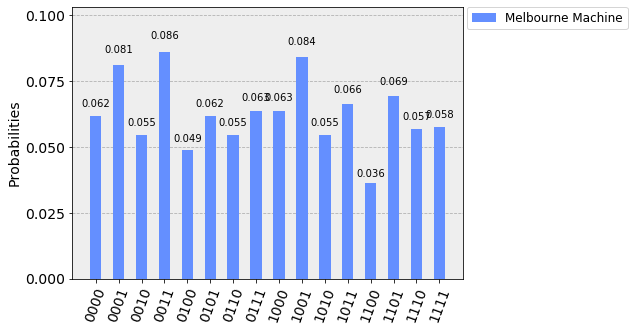

In [52]:
result_exp = job_exp.result()
counts_exp = result_exp.get_counts(qc)
plot_histogram([counts_exp], legend=['Melbourne Machine'])

In [53]:
#If we neglect the errors on the syndrome qubit for now
#On this measurement, we observe that we have at least one bitflip error on a computationnal qubit in 93,8% of the cases
#On those graphs, we can see that when q5,6,7 and 8 don't show an error (results 1000 and 0000) q4 has an error in 50% of the cases
#When q4,5,6 and 7 do not show any error (0000 and 0001), q8 has an error in 56,6% of the cases
#By association between the intermediate results, we can also estimate the strength of each qubit

#we can also run the algorithm once and see precisely where the error(s) occured
job_exp1 = execute(qc, backend=backend, shots=1)
job_monitor(job_exp1)

Job Status: job has successfully run


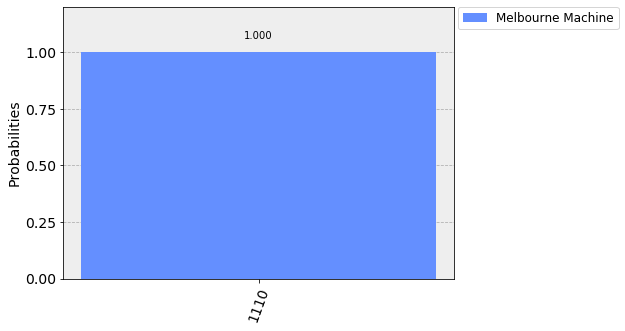

In [55]:
result_exp1 = job_exp1.result()
counts_exp1 = result_exp1.get_counts(qc)
plot_histogram([counts_exp1], legend=['Melbourne Machine'])

In [14]:
#on this one shot example, we see that qubits 0,1 and 2 measured 1
#q0=1 means there is an error on either q4 or q5
#q1=1 means there is an error on either q5 or q6
#q2=1 means there is an error on either q6 or q7
#The most plausible case would be to have 2 bitflip errors, one on q4 and one on q6

#we can give it another try
job_exp2 = execute(qc, backend=backend, shots=1)
job_monitor(job_exp2)

Job Status: job has successfully run


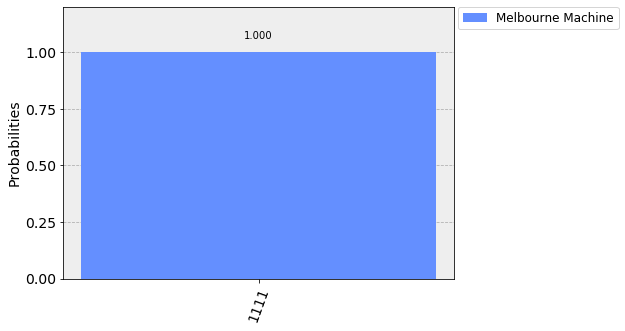

In [16]:
result_exp2 = job_exp2.result()
counts_exp2 = result_exp2.get_counts(qc)
plot_histogram([counts_exp2], legend=['Melbourne Machine'])

In [ ]:
#here, we can say that there are errors, but not on neighbours qubits (otherwise they would have the same value and the syndrome would be measured as 0)
# It can be: error on q4, q6 and q8 OR error on q5 and q7